In [1]:
import pandas as pd
import oracledb
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

### 1. 성별에 따른 소비 분석 시각화

In [ ]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

query = """
SELECT
    g.gender,
    g.card_total,
    i.upjong
FROM
    gender_stats g
INNER JOIN
    industry_codes i
    ON g.upjong_code = i.upjong_code
"""

df = pd.read_sql(query, conn)
conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
df.rename(columns={
    'GENDER': 'gender',
    'CARD_TOTAL': 'card_total',
    'UPJONG': 'upjong',
}, inplace=True)

In [4]:
grouped = df.groupby(['gender', 'upjong'])['card_total'].sum().unstack()

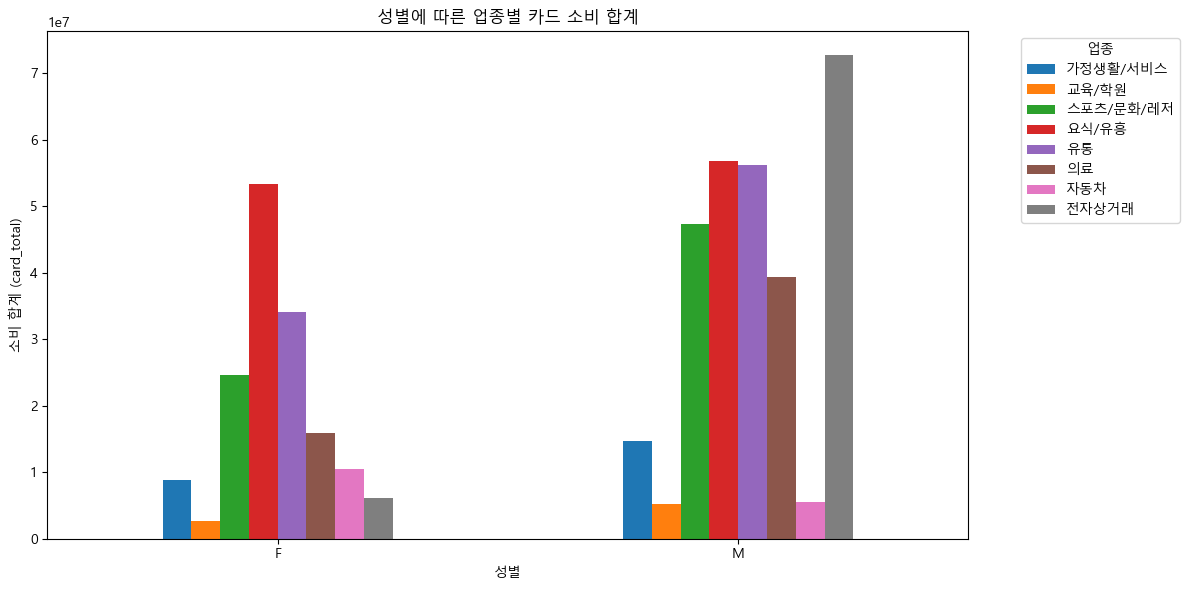

In [5]:
# 시각화
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('성별에 따른 업종별 카드 소비 합계')
plt.xlabel('성별')
plt.ylabel('소비 합계 (card_total)')
plt.xticks(rotation=0)
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2. 연령대에 따른 소비 분석 시각화

In [6]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

query = """
SELECT
    a.age_group,
    a.card_total,
    i.upjong
FROM
    age_stats a
INNER JOIN
    industry_codes i
    ON a.upjong_code = i.upjong_code
"""

df = pd.read_sql(query, conn)
conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
df.rename(columns={
    'AGE_GROUP': 'age_group',
    'CARD_TOTAL': 'card_total',
    'UPJONG': 'upjong',
}, inplace=True)

In [8]:
grouped = df.groupby(['age_group', 'upjong'])['card_total'].sum().unstack()

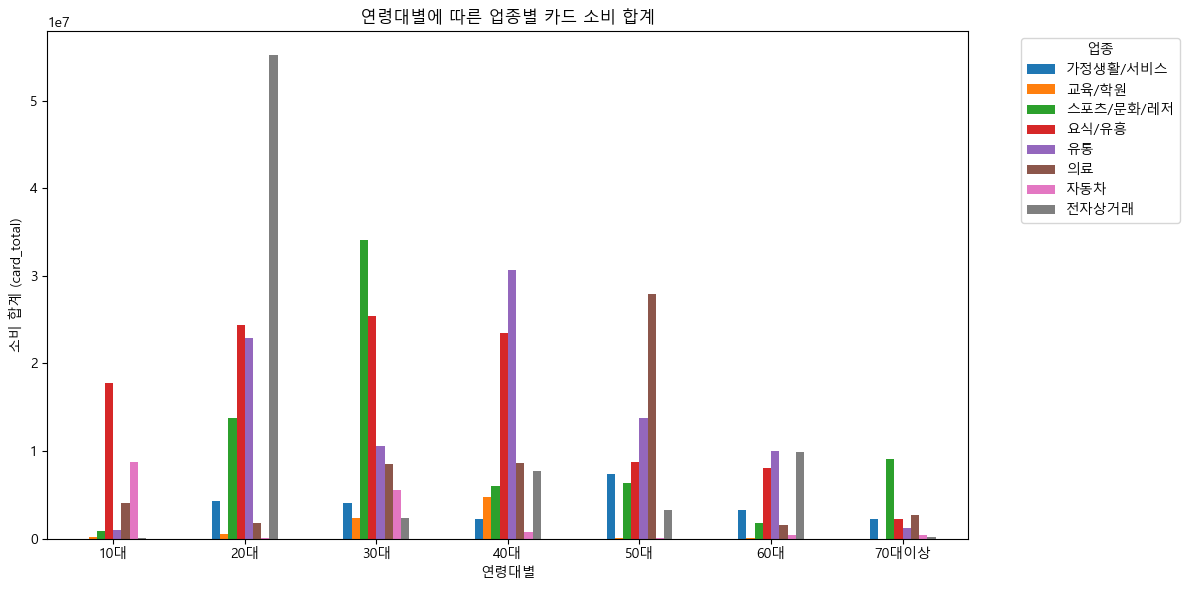

In [9]:
# 시각화
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('연령대별에 따른 업종별 카드 소비 합계')
plt.xlabel('연령대별')
plt.ylabel('소비 합계 (card_total)')
plt.xticks(rotation=0)
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3. 시간대에 따른 소비 분석 시각화

In [10]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

query = """
SELECT
    m.time_slot,
    m.card_total,
    i.upjong
FROM
    micro_payment_stats m
INNER JOIN
    industry_codes i
    ON m.upjong_code = i.upjong_code
"""

df = pd.read_sql(query, conn)
conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [11]:
df.rename(columns={
    'TIME_SLOT': 'time_slot',
    'CARD_TOTAL': 'card_total',
    'UPJONG': 'upjong',
}, inplace=True)

In [12]:
grouped = df.groupby(['time_slot', 'upjong'])['card_total'].sum().unstack()

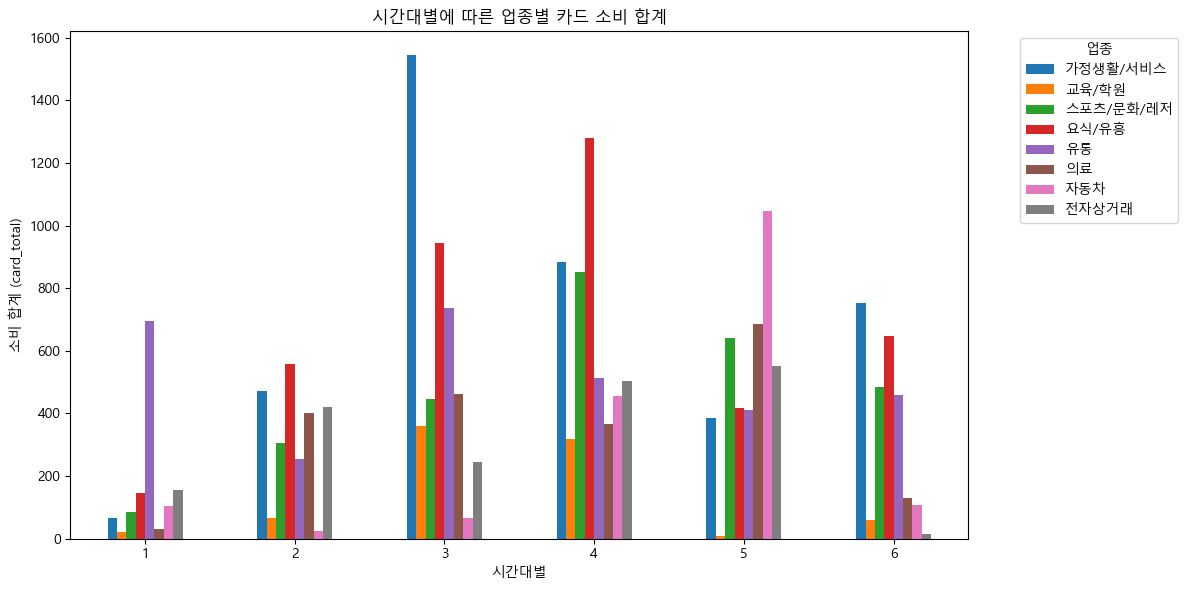

In [13]:
# 시각화
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('시간대별에 따른 업종별 카드 소비 합계')
plt.xlabel('시간대별')
plt.ylabel('소비 합계 (card_total)')
plt.xticks(rotation=0)
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4. 지역별에 따른 소비 분석 시각화

In [14]:
# 1. Oracle DB 연결 및 데이터 불러오기
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

query = """
SELECT
    r.sido,
    r.card_total,
    i.upjong
FROM
    region_stats r
INNER JOIN
    industry_codes i
    ON r.upjong_code = i.upjong_code
"""

df = pd.read_sql(query, conn)
conn.close()

e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [15]:
df.rename(columns={
    'SIDO': 'sido',
    'CARD_TOTAL': 'card_total',
    'UPJONG': 'upjong',
}, inplace=True)

In [16]:
grouped = df.groupby(['sido', 'upjong'])['card_total'].sum().unstack()

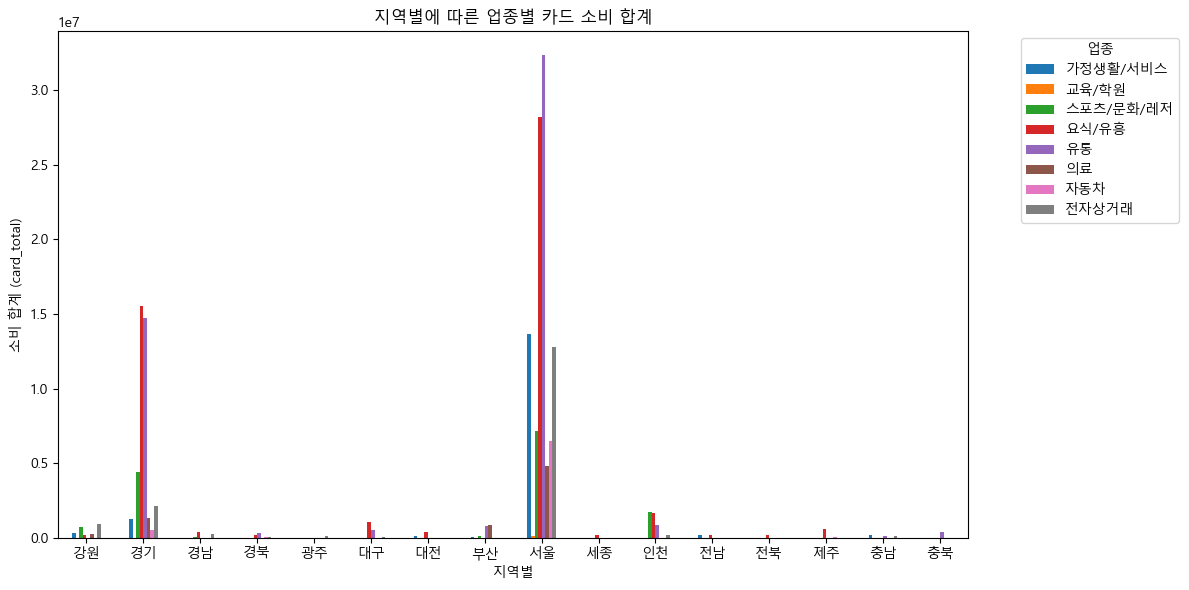

In [17]:
# 시각화
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('지역별에 따른 업종별 카드 소비 합계')
plt.xlabel('지역별')
plt.ylabel('소비 합계 (card_total)')
plt.xticks(rotation=0)
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 5. 카드 이용 금액별 사용 분석

In [18]:
# 1. Oracle DB 연결
conn = oracledb.connect(
    user="moa",
    password="moa",
    dsn="localhost:1521/XE"
)

# 3개 테이블에서 card_total 가져오기
tables = ["gender_stats", "age_stats", "region_stats"]
dfs = []

for table in tables:
    query = f"SELECT card_total FROM {table}"
    df_part = pd.read_sql(query, conn)
    df_part = df_part.rename(columns=str.lower)  # 컬럼명 소문자로 변경
    dfs.append(df_part)

conn.close()


e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
e:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [19]:
# 모든 데이터 합치기
df_all = pd.concat(dfs, ignore_index=True)

# ---------------------
# 총액 기준
# ---------------------
bins_amount = [0, 500000, 1000000, 5000000, float('inf')]
labels_amount = ['A: 0~50만', 'A: 50만~100만', 'A: 100만~500만', 'A: 500만 이상']

df_all['amount_range_total'] = pd.cut(df_all['card_total'], 
                                      bins=bins_amount, 
                                      labels=labels_amount, 
                                      right=False)

range_sums = df_all.groupby('amount_range_total')['card_total'].sum()

# ---------------------
# 건수 기준
# ---------------------
bins_count = [0, 50000, 100000, 5000000, float('inf')]  # 동일한 구간
labels_count = ['C: 0~5만', 'C: 5만~10만', 'C: 10만~50만', 'C: 50만 이상']

df_all['amount_range_count'] = pd.cut(df_all['card_total'], 
                                      bins=bins_count, 
                                      labels=labels_count, 
                                      right=False)

range_counts = df_all['amount_range_count'].value_counts().sort_index()

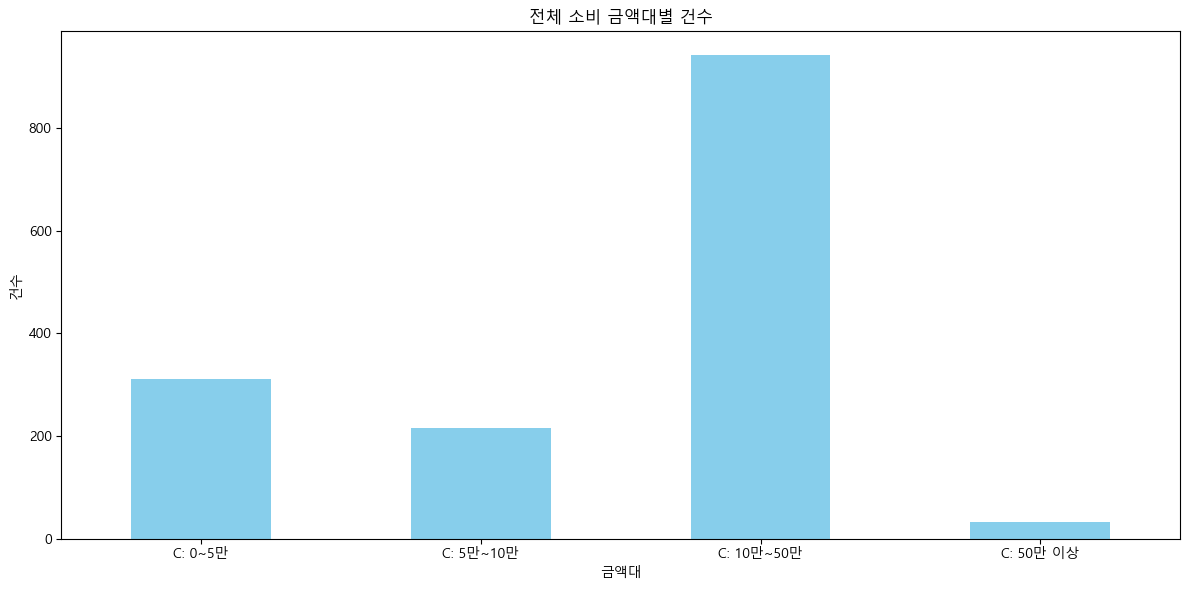

In [20]:
# --- 시각화 1: 건수 기준 ---
plt.figure(figsize=(12,6))
range_counts.plot(kind='bar', color='skyblue')
plt.title('전체 소비 금액대별 건수')
plt.xlabel('금액대')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

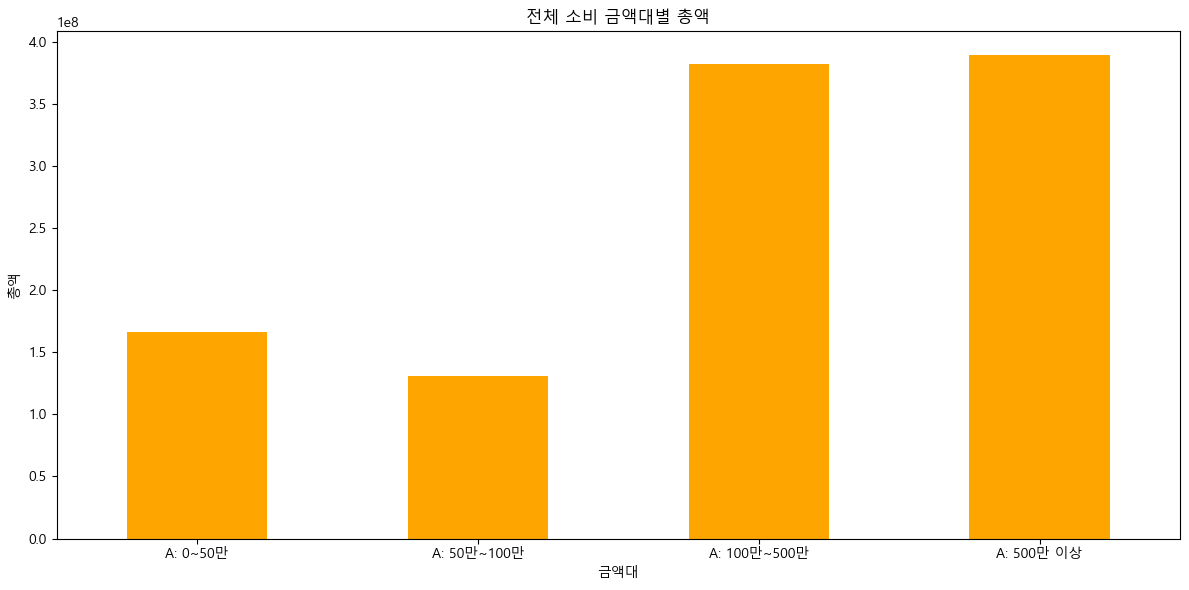

In [21]:
# --- 시각화 2: 총액 기준 ---
plt.figure(figsize=(12,6))
range_sums.plot(kind='bar', color='orange')
plt.title('전체 소비 금액대별 총액')
plt.xlabel('금액대')
plt.ylabel('총액')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 6. 총집합

In [6]:
import requests
import pandas as pd
import json

base_url = "http://localhost:8809/csv"

# ==============================
# 1. 연령/성별 상위 5개
# ==============================
df_age = pd.DataFrame(requests.get(f"{base_url}/age").json())
df_age = df_age[['age','gender','card_TOTAL']].dropna()
df_age['card_TOTAL'] = df_age['card_TOTAL'].astype(int)

# 연령+성별 그룹화 후 합계
df_age_grouped = df_age.groupby(['age','gender'], as_index=False)['card_TOTAL'].sum()
# 카드 총액 상위 5개
df_age_top5 = df_age_grouped.sort_values('card_TOTAL', ascending=False).head(5)

age_chart = {
    "labels": [f"{row['age']}({row['gender']})" for _, row in df_age_top5.iterrows()],
    "values": df_age_top5['card_TOTAL'].tolist()
}

# ==============================
# 2. 지역 상위 5개
# ==============================
df_region = pd.DataFrame(requests.get(f"{base_url}/region").json())
df_region = df_region[['sido','card_TOTAL']].dropna()
df_region['card_TOTAL'] = df_region['card_TOTAL'].astype(int)

# 지역별 합계
df_region_grouped = df_region.groupby('sido', as_index=False)['card_TOTAL'].sum()
df_region_top5 = df_region_grouped.sort_values('card_TOTAL', ascending=False).head(5)

region_chart = {
    "labels": df_region_top5['sido'].tolist(),
    "values": df_region_top5['card_TOTAL'].tolist()
}

# ==============================
# 3. 시간대 상위 5개
# ==============================
df_time = pd.DataFrame(requests.get(f"{base_url}/time").json())
df_time = df_time[['time','card_TOTAL']].dropna()
df_time['card_TOTAL'] = df_time['card_TOTAL'].astype(int)

# 시간대별 합계
df_time_grouped = df_time.groupby('time', as_index=False)['card_TOTAL'].sum()
df_time_top5 = df_time_grouped.sort_values('card_TOTAL', ascending=False).head(5)

time_chart = {
    "labels": df_time_top5['time'].tolist(),
    "values": df_time_top5['card_TOTAL'].tolist()
}

# ==============================
# 최종 JSON
# ==============================
chart_data = {
    "age": age_chart,
    "region": region_chart,
    "time": time_chart
}

print(json.dumps(chart_data, ensure_ascii=False, indent=2))

{
  "age": {
    "labels": [
      "20대(M)",
      "30대(M)",
      "40대(M)",
      "50대(M)",
      "30대(F)"
    ],
    "values": [
      9387,
      5833,
      5078,
      4864,
      3429
    ]
  },
  "region": {
    "labels": [
      "서울",
      "경기",
      "인천",
      "강원",
      "부산"
    ],
    "values": [
      105614027,
      40025024,
      4512740,
      2536322,
      1913412
    ]
  },
  "time": {
    "labels": [
      4,
      3,
      5,
      6,
      2
    ],
    "values": [
      5172,
      4804,
      4150,
      2654,
      2503
    ]
  }
}


In [ ]:
def recommend_card_by_demographics(gender, age, region, time_slot, upjong_code):
    recommendations = []

    # 나이대 변환
    def get_age_range(age):
        if 20 <= age < 30:
            return "20대"
        elif 30 <= age < 40:
            return "30대"
        elif 40 <= age < 50:
            return "40대"
        elif 50 <= age < 60:
            return "50대"
        elif 60 <= age < 70:
            return "60대"
        else:
            return "70대 이상"

    user_age_range = get_age_range(age)

    # 업종 코드 매핑
    upjong_mapping = {
        'ss001': "요식·유흥 할인 카드",
        'ss002': "유통업종 특화 카드",
        'ss003': "스포츠/문화/레저 할인 카드",
        'ss004': "생활서비스 특화 카드",
        'ss005': "교육/학원 특화 카드",
        'ss006': "의료비 절감 카드",
        'ss007': "자동차·주유 특화 카드",
        'ss008': "온라인 쇼핑·전자상거래 특화 카드"
    }

    # 추천 후보 정의 (age_range와 region을 리스트로 통일)
    candidates = [
        
    ]

    total_criteria = 5  # 성별, 연령, 지역, 시간대, 업종

    for c in candidates:
        score = 0
        # 성별
        if "전체" in c["gender"] or c["gender"] == gender:
            score += 1
        # 나이
        if "전체" in c["age_range"] or user_age_range in c["age_range"]:
            score += 1
        # 지역
        if "전체" in c["region"] or region in c["region"]:
            score += 1
        # 시간대
        if "전체" in c["time_slot"] or time_slot in c["time_slot"]:
            score += 1
        # 업종
        if upjong_code in c["upjong"]:
            score += 1

        if c["name"]:  # 이름이 있으면 추천 후보로
            recommendations.append({"card": c["name"], "score": round(score/total_criteria,2)})

    # 적합도 순 정렬
    recommendations.sort(key=lambda x: x["score"], reverse=True)
    return recommendations

In [2]:
cards = recommend_card_by_demographics('여성', 28, '서울', '18~24', 'ss001')
for c in cards:
    print(f"{c['card']} (적합도: {c['score']*100:.1f}%)")

요식·유흥 할인 카드 (적합도: 100.0%)
뷰티·패션 특화 카드 (적합도: 80.0%)
온라인 쇼핑·간편결제 특화 카드 (적합도: 80.0%)
가족/외식 특화 카드 (적합도: 80.0%)
대형마트·교통 특화 카드 (적합도: 80.0%)
심야 할인 카드 (적합도: 80.0%)
주유·마트 특화 카드 (적합도: 60.0%)
여행·건강 특화 카드 (적합도: 60.0%)
지역 가맹점 할인 카드 (적합도: 60.0%)
직장인 특화 카드 (적합도: 60.0%)
무실적 생활밀착 카드 (적합도: 60.0%)
